In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys
sys.path.append("..")
from data import Data
from NN_models import RNN

In [10]:
data = Data("BTC")
data.load_data()
#choose for our estimation
data.create_RNN_data(reg='return',LAG=10)

In [11]:
data.df.head(10)

High      Low    Close       Volume  QuoteAssetVolume  NumberofTrade  \
0  3976.99  3850.05  3882.35   526.727987      2.061196e+06           7971   
1  4249.94  3872.81  4193.00   628.170966      2.554630e+06           8373   
2  4300.00  4101.00  4174.50   849.785325      3.553179e+06          11426   
3  4263.86  3952.01  4174.69  1602.309565      6.571746e+06          14834   
4  4380.00  4138.10  4378.51   720.353183      3.088354e+06           9324   
5  4406.52  4240.04  4378.48   726.963685      3.137144e+06           9816   
6  4561.63  4360.00  4380.00   655.756974      2.905283e+06           8185   
7  4467.33  4180.80  4310.00  1082.323563      4.627423e+06          12379   
8  4373.00  4142.00  4208.59   868.465101      3.676415e+06          11006   
9  4355.00  4110.00  4292.43   779.138638      3.295533e+06           9158   

   TakerbuybaseV  TakerbuyquoteV        date  tweet_count  ...    RSI_10  \
0     225.570283    8.839250e+05  2017-09-26          4.0  ...  0.517851   
1     348.083641    1.418522e+06  2017-09-27          6.0  ...  0.695859   
2     364.517452    1.525467e+06  2017-09-28          5.0  ...  0.719106   
3     660.408235    2.706154e+06  2017-09-29          5.0  ...  0.562665   
4     292.966693    1.258540e+06  2017-09-30          6.0  ...  0.637748   
5     291.975904    1.263466e+06  2017-10-01          5.0  ...  0.654312   
6     289.541406    1.286787e+06  2017-10-02          3.0  ...  0.739469   
7     492.735181    2.107462e+06  2017-10-03          4.0  ...  0.548631   
8     292.928777    1.237552e+06  2017-10-04          5.0  ...  0.513557   
9     351.042019    1.483037e+06  2017-10-05          1.0  ...  0.482466   

    MACD_5_10  MACDsign_5_10  MACDdiff_5_10  Mass Index    vix    gvz  \
0   -2.530602     -54.663242      52.132641   26.109484  10.17  13.32   
1   54.983456     -32.719995      87.703450   25.757318   9.87  12.99   
2   80.219958     -10.120545      90.340503   25.387200   9.55  11.75   
3   89.152264       9.742074      79.410190   25.010401   9.51  11.77   
4  119.498628      31.700511      87.798117   24.482740   9.51  11.77   
5  128.804279      51.126308      77.677972   24.092573   9.51  11.77   
6  126.304034      66.164976      60.139058   23.798872   9.45  11.72   
7  106.680238      74.269375      32.410862   23.484186   9.51  11.38   
8   74.146713      74.244840      -0.098127   23.304894   9.63  11.41   
9   64.609774      72.317621      -7.707847   23.146156   9.19  11.40   

   Close_std  Close_ret_t+1  pump_5  
0  -0.689424       0.076976       1  
1  -0.665828      -0.004422       0  
2  -0.667233       0.000046       0  
3  -0.667219       0.047668       0  
4  -0.651737      -0.000007       0  
5  -0.651740       0.000347       0  
6  -0.651624      -0.016111       0  
7  -0.656941      -0.023810       0  
8  -0.664644       0.019725       0  
9  -0.658276       0.017681       0  

[10 rows x 33 columns]

# Correlation with pump > 5%

In [12]:
data.df.corr()['pump_5']

High                0.055327
Low                 0.049872
Close               0.052338
Volume              0.058451
QuoteAssetVolume    0.073317
NumberofTrade       0.066020
TakerbuybaseV       0.057386
TakerbuyquoteV      0.073311
tweet_count         0.113889
daily_sent         -0.015086
elonmusk            0.056388
michael_saylor     -0.020622
binance             0.049314
investingcom        0.102593
peterlbrandt       -0.020695
raoulgmi           -0.026860
coinmarketcap       0.059639
apompliano         -0.020844
cashapp            -0.017180
charliebilello      0.008407
MA_10               0.053787
ADX_2_7             0.044139
RSI_10              0.028696
MACD_5_10           0.023801
MACDsign_5_10       0.042954
MACDdiff_5_10      -0.019581
Mass Index          0.047492
vix                 0.052031
gvz                 0.046839
Close_std           0.052338
Close_ret_t+1       0.588834
pump_5              1.000000
Name: pump_5, dtype: float64

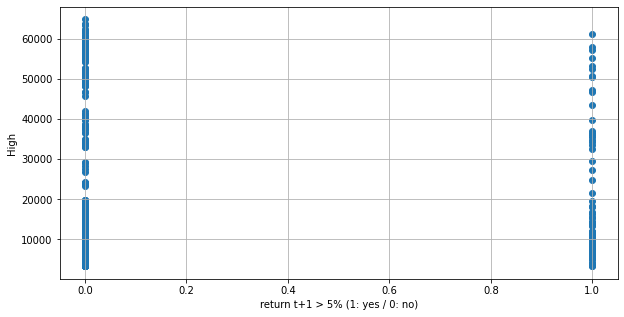

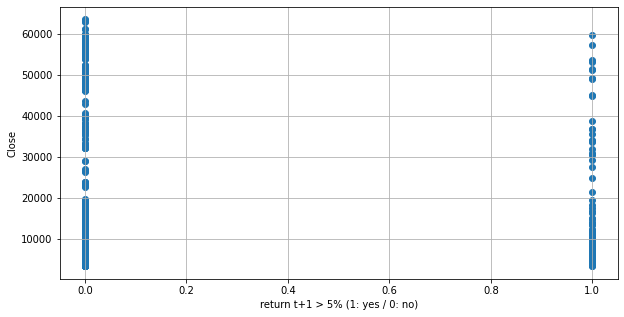

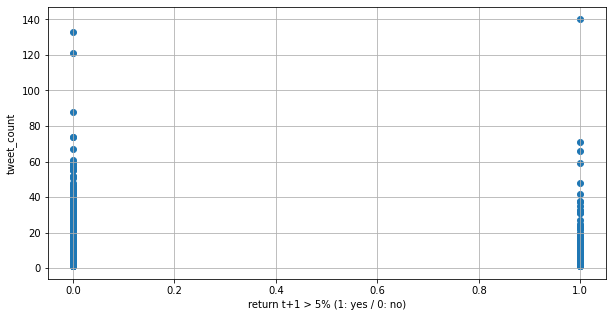

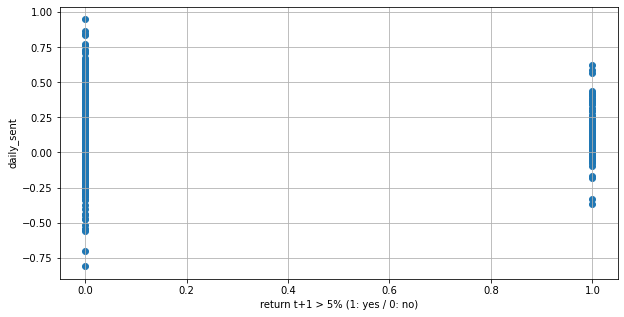

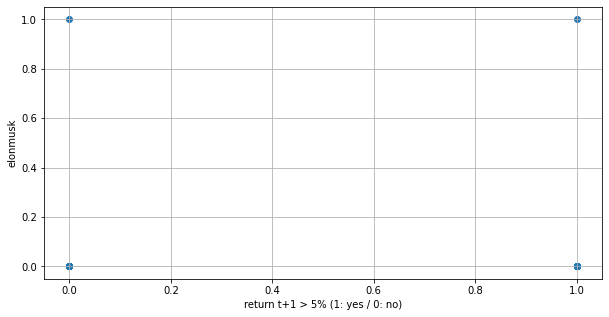

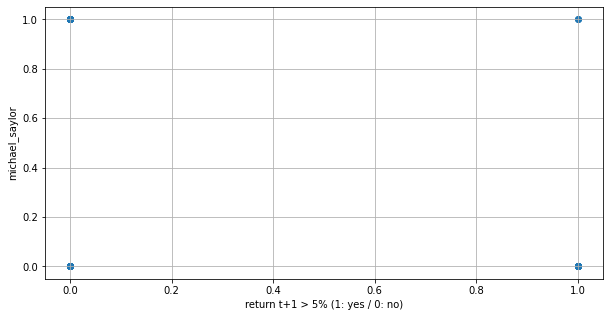

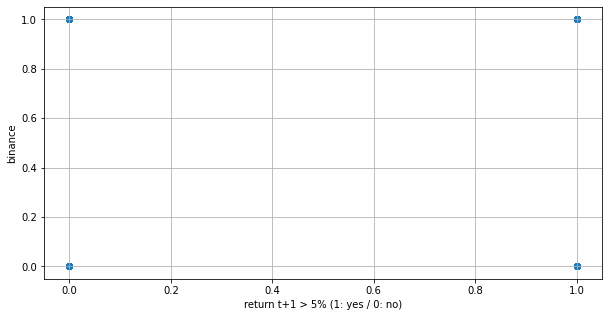

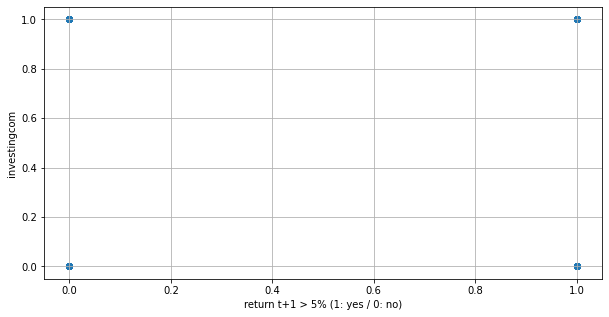

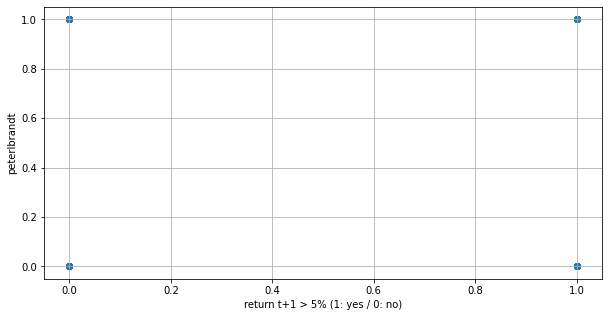

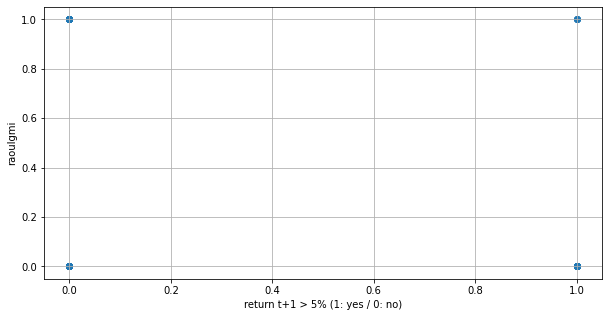

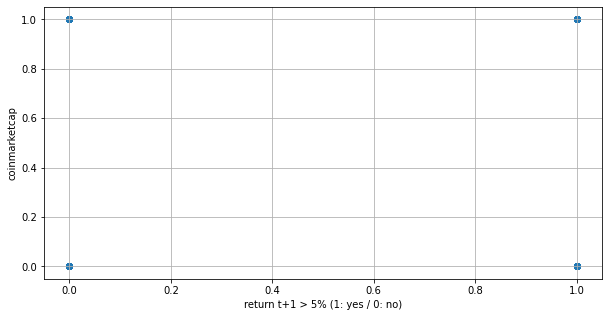

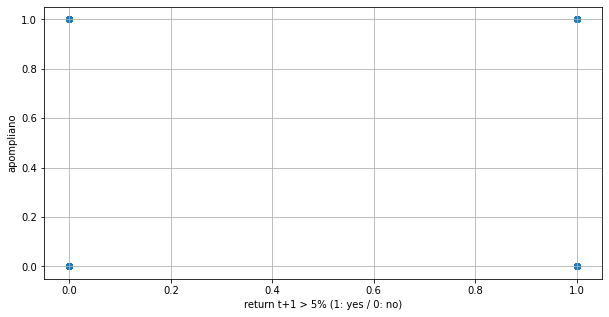

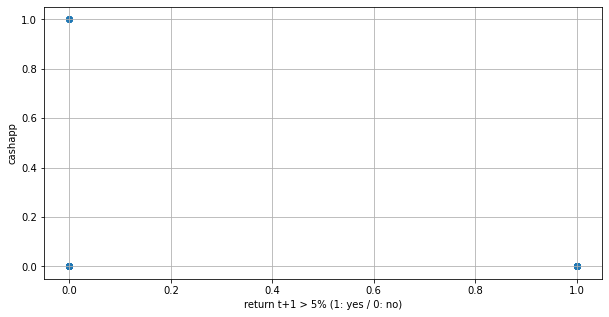

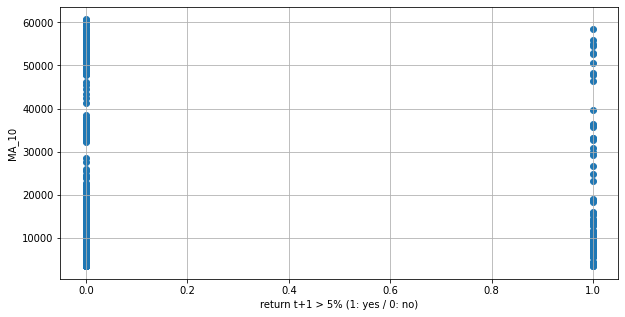

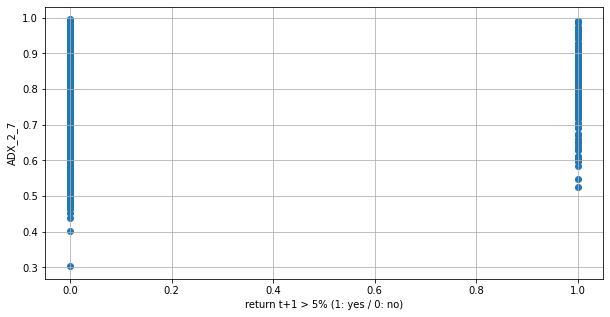

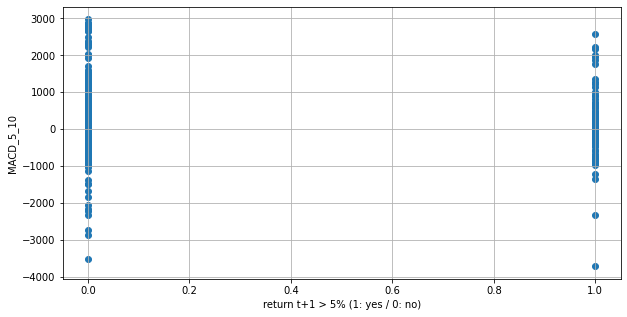

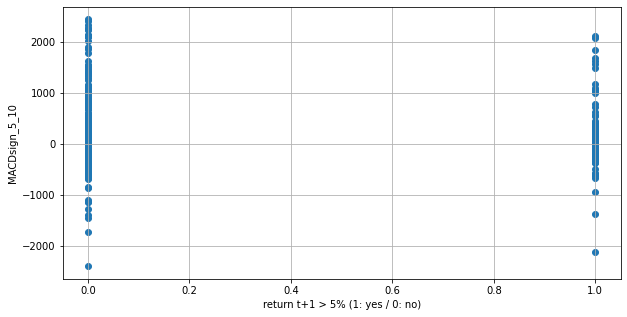

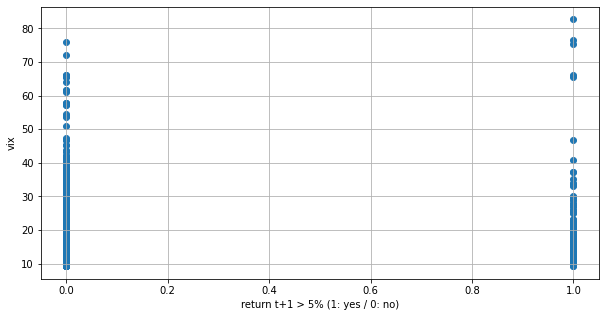

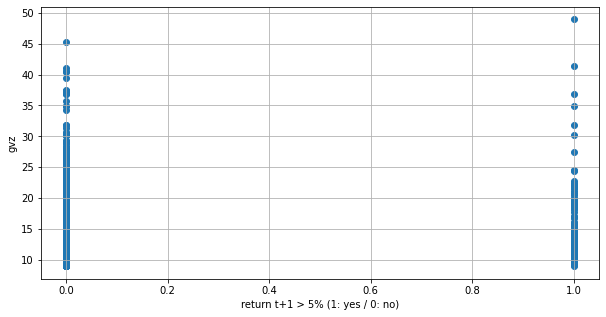

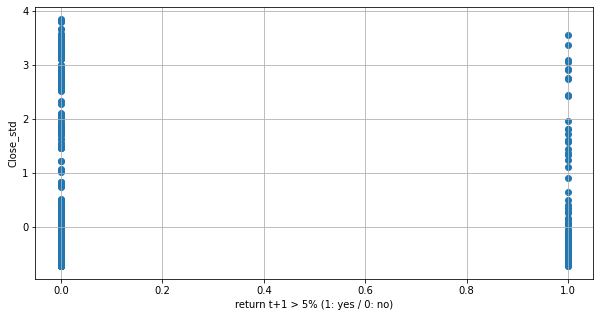

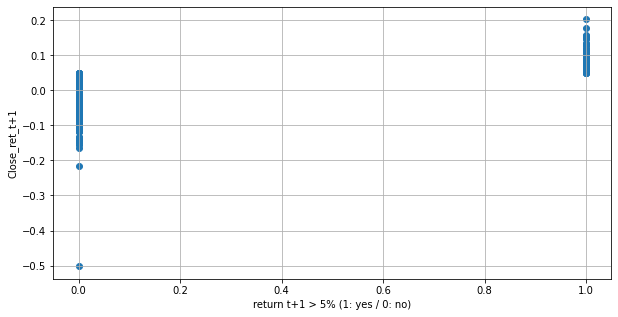

In [13]:
for columns in data.df.columns:
    if columns != "pump_5" and columns != 'date':
        fig = plt.figure(figsize=(10,5))
        plt.scatter(data.df["pump_5"],data.df[columns])
        plt.xlabel("return t+1 > 5% (1: yes / 0: no)")
        plt.ylabel(columns)
        plt.grid(True)
        plt.show()